# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Your code here
pd.set_option("display.max_columns", None)  
websites.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
# Your comment here

websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [5]:
websites.Type.value_counts()

Type
0    1565
1     216
Name: count, dtype: int64

`COMMENT: From this values, we will assume that 1 stands for malicious websites. I would transform the WHOIS_STATEPRO, WHOIS_REGDATE and WHOIS_UPDATED_DATE in to a readable date type. Also country need to be normalized`

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [6]:
# Your code here

website_numerical = websites.select_dtypes(np.number)
website_numerical

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,NaN,0,0,0,0,0,3,186,0,0,0.0,1
1777,198,17,NaN,0,0,0,0,0,2,124,0,0,0.0,1
1778,201,34,8904.0,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,234,34,NaN,0,0,0,0,0,0,0,0,0,0.0,0


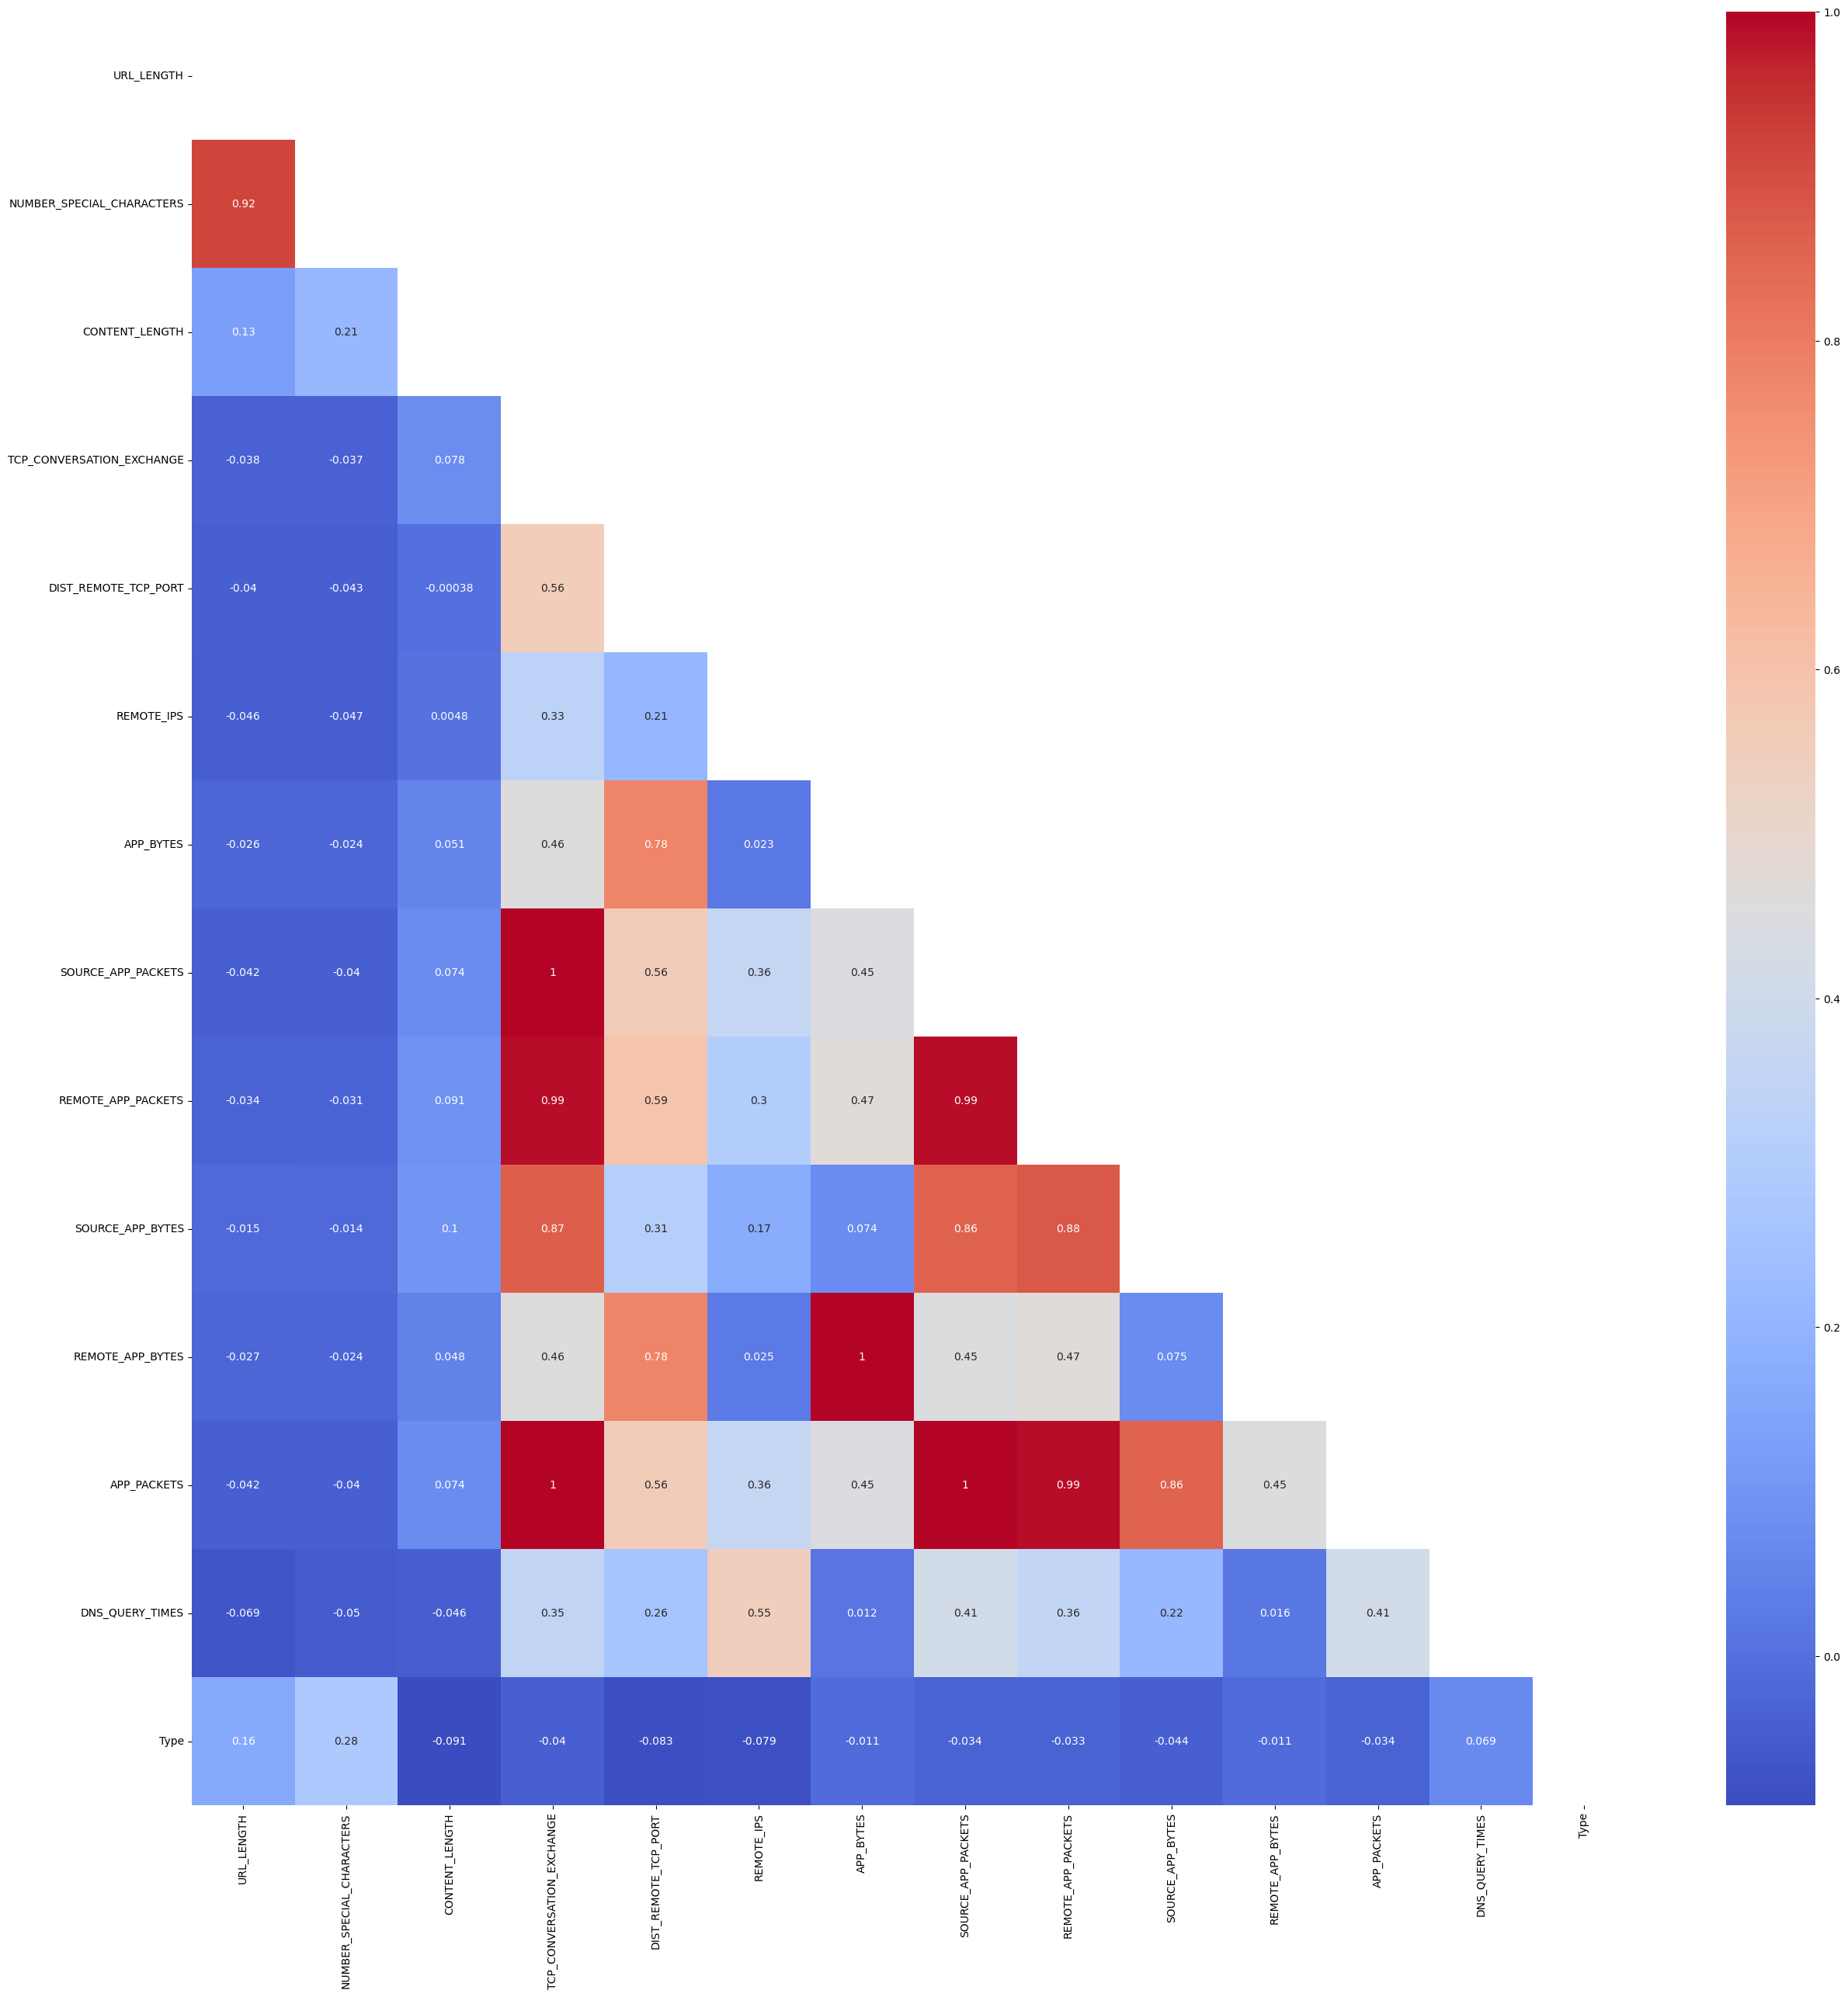

In [7]:
# Your comment here

import seaborn as sns 
import matplotlib.pyplot as plt 

mask = np.triu(np.ones_like(website_numerical.corr(), dtype=bool))

fig = plt.figure(figsize=(30, 30))
sns.heatmap(website_numerical.corr(), annot=True, cmap="coolwarm", mask=mask)  
plt.show()



`COMMENT: I would remove APP_KEYS, TCP_CONVERSATION_EXCHANGE and SOURCE_APP_PACKETS`

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [8]:
# Your code here

websites_after_corr = website_numerical.drop(["APP_PACKETS", "TCP_CONVERSATION_EXCHANGE", "SOURCE_APP_PACKETS" ], axis=1)

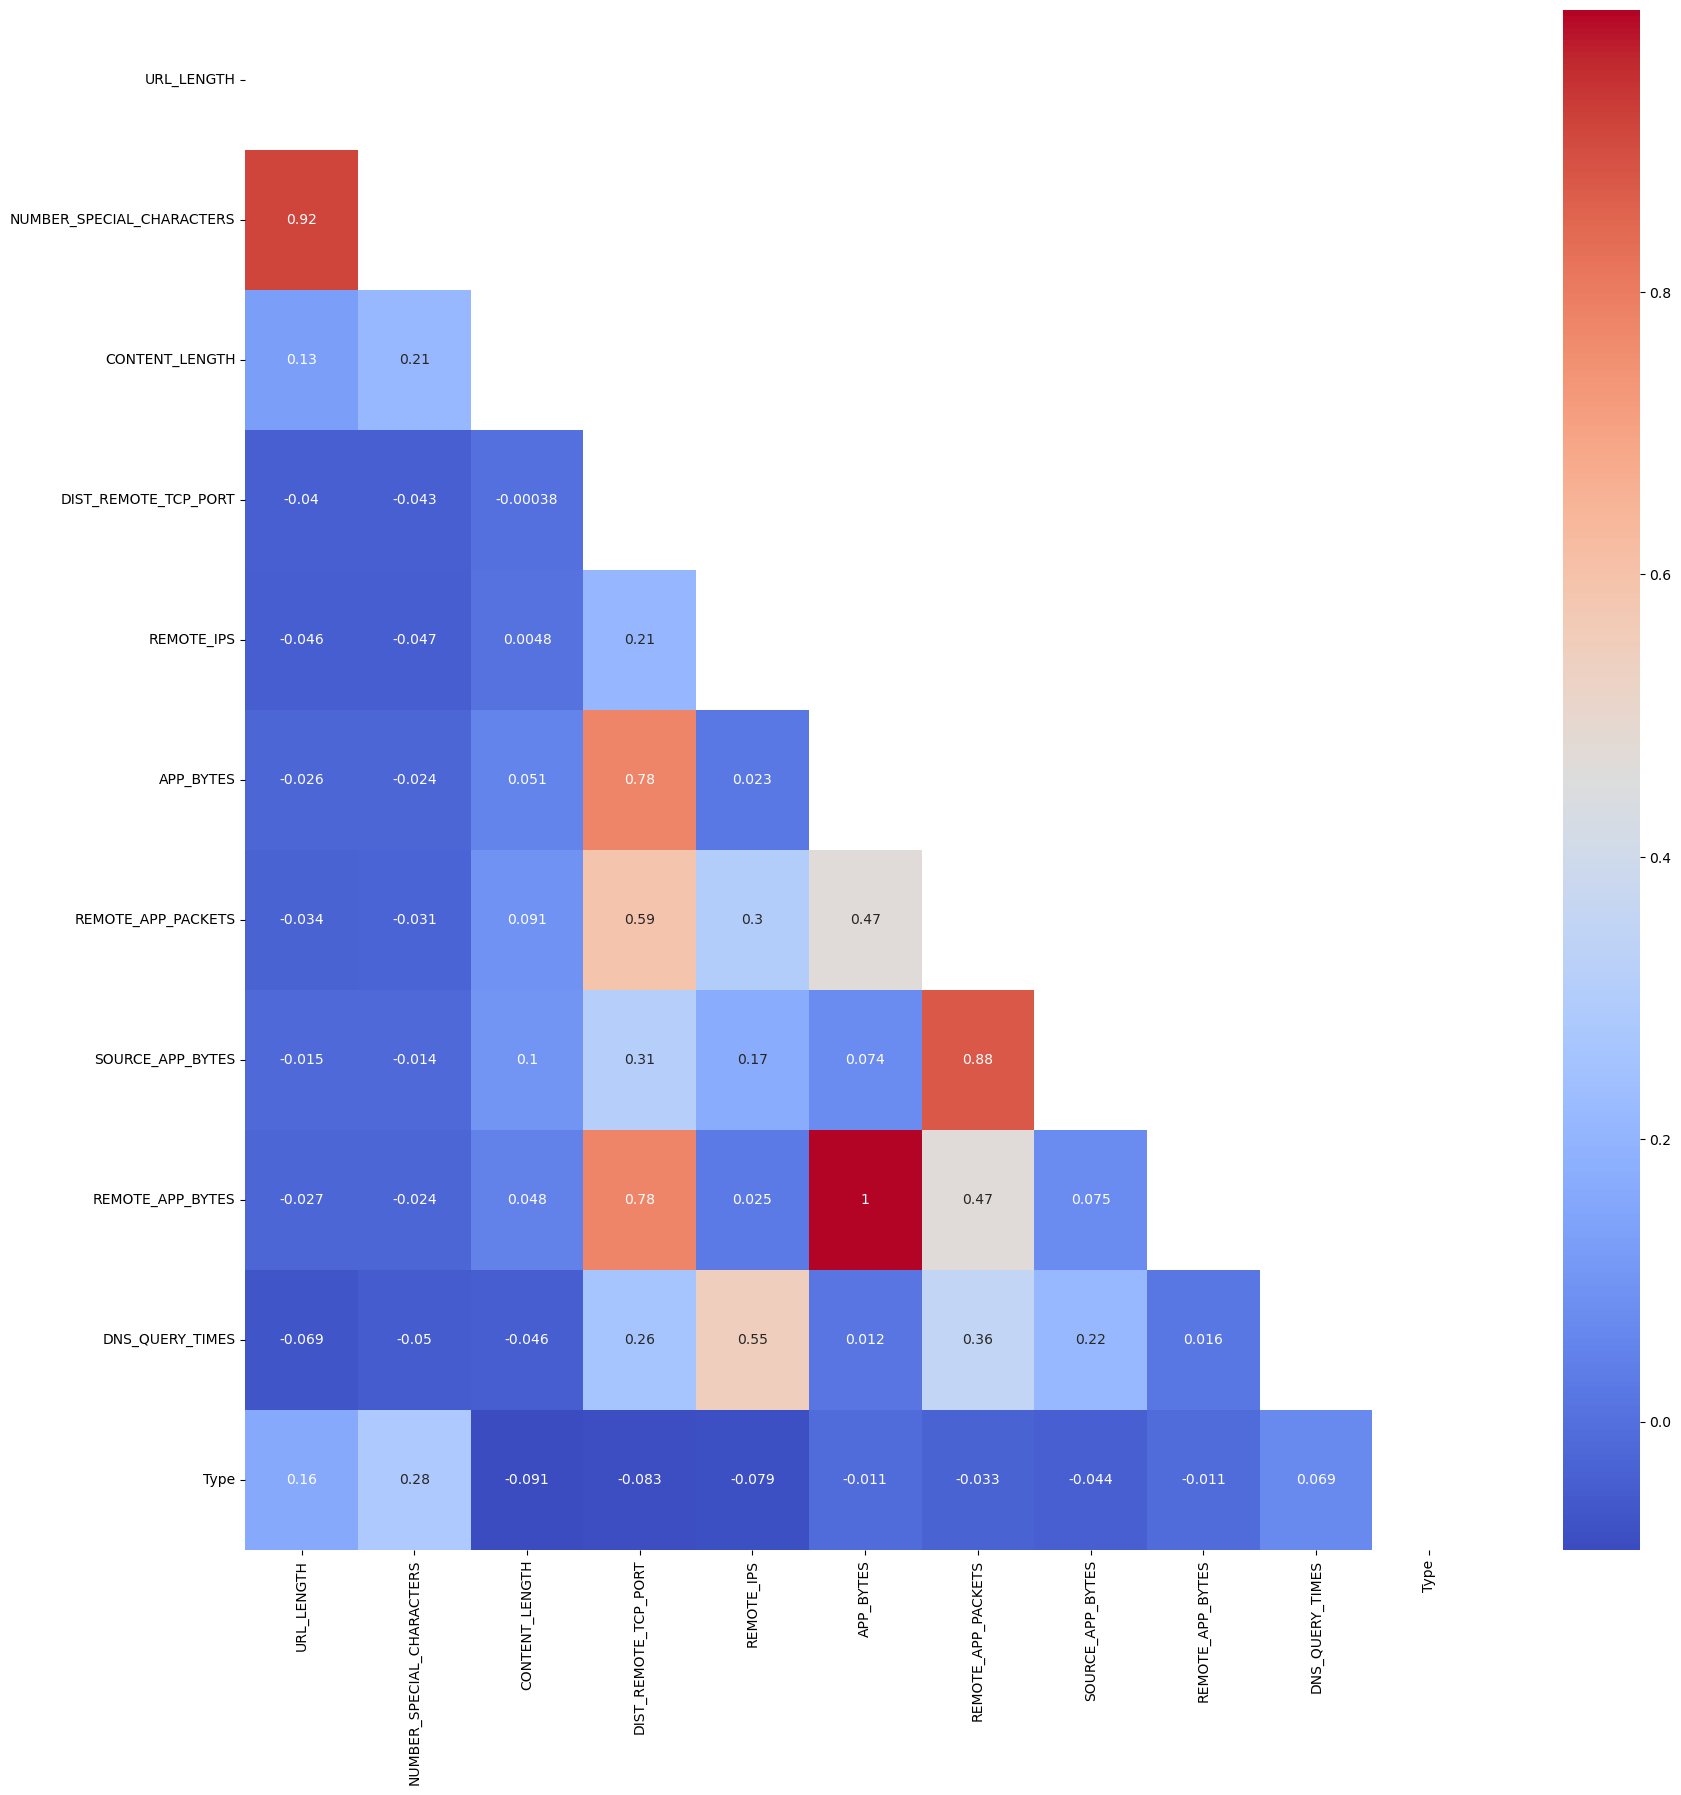

In [9]:
# Your comment here

mask = np.triu(np.ones_like(websites_after_corr.corr(), dtype=bool))

fig = plt.figure(figsize=(20, 20))
sns.heatmap(websites_after_corr.corr(), annot=True, cmap="coolwarm", mask=mask)  
plt.show()

`COMMENT: APP_BYTES and REMOTE APP_BYTES have a high corr so one of them need to go. I would drop the one with corr close to zero, so APP_BYTES`

In [10]:
websites_after_corr2 = websites_after_corr.drop(["APP_BYTES"], axis=1)

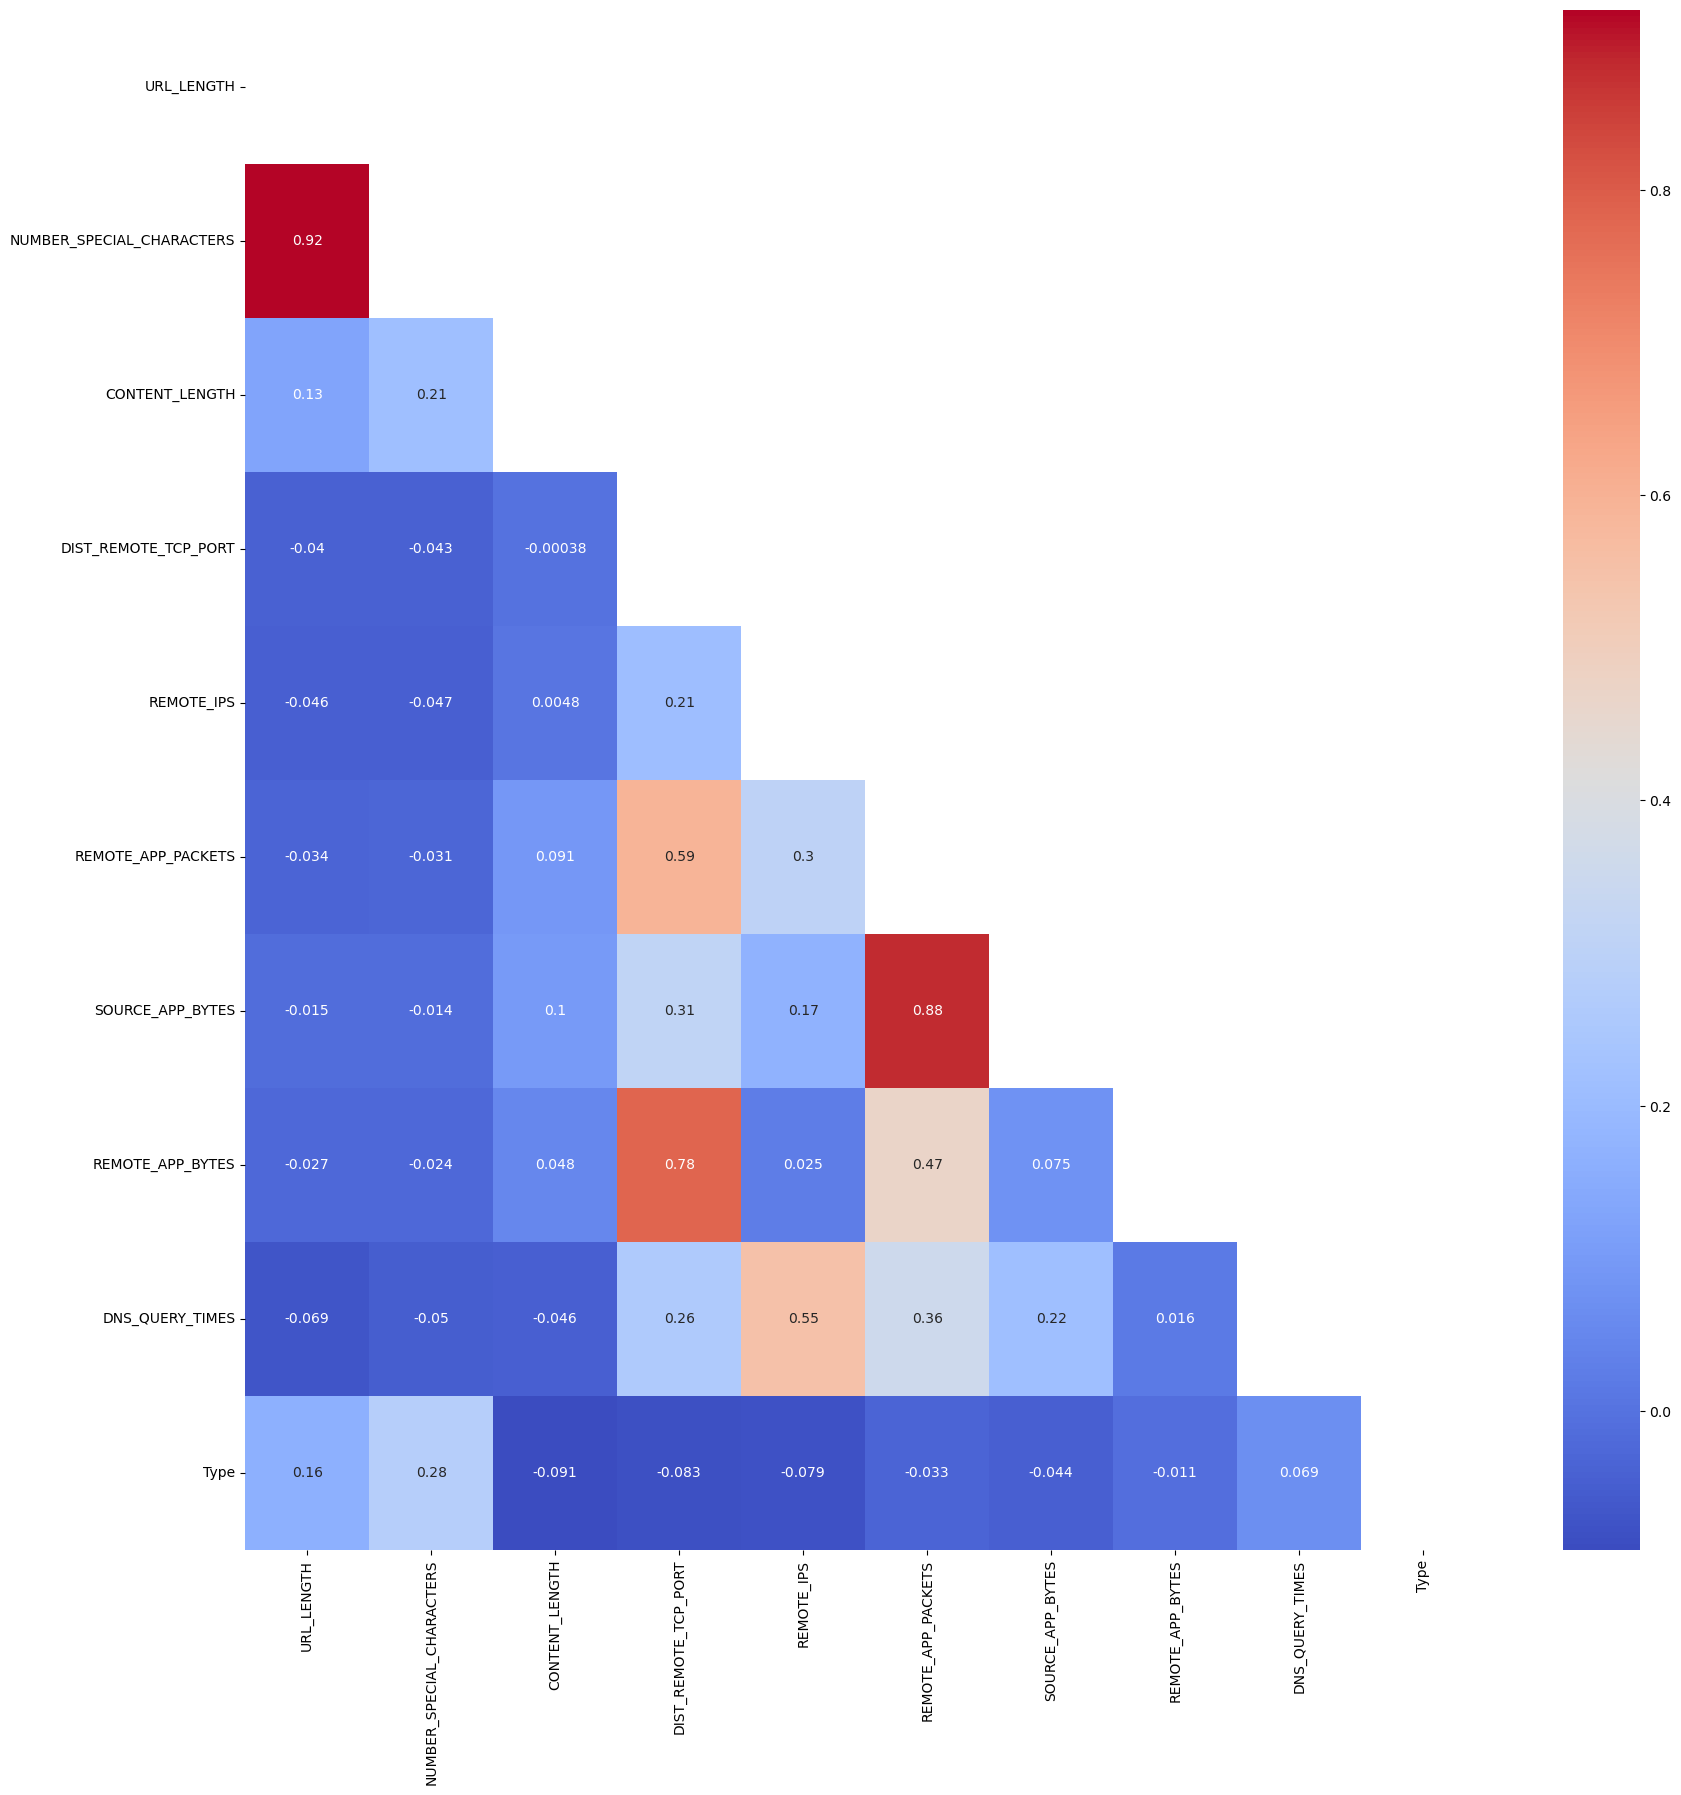

In [11]:
# Print heatmap again
mask = np.triu(np.ones_like(websites_after_corr2.corr(), dtype=bool))

fig = plt.figure(figsize=(20, 20))
sns.heatmap(websites_after_corr2.corr(), annot=True, cmap="coolwarm", mask=mask)  
plt.show()

`COMMENT: By the same way, URL_LENGTH need to go`

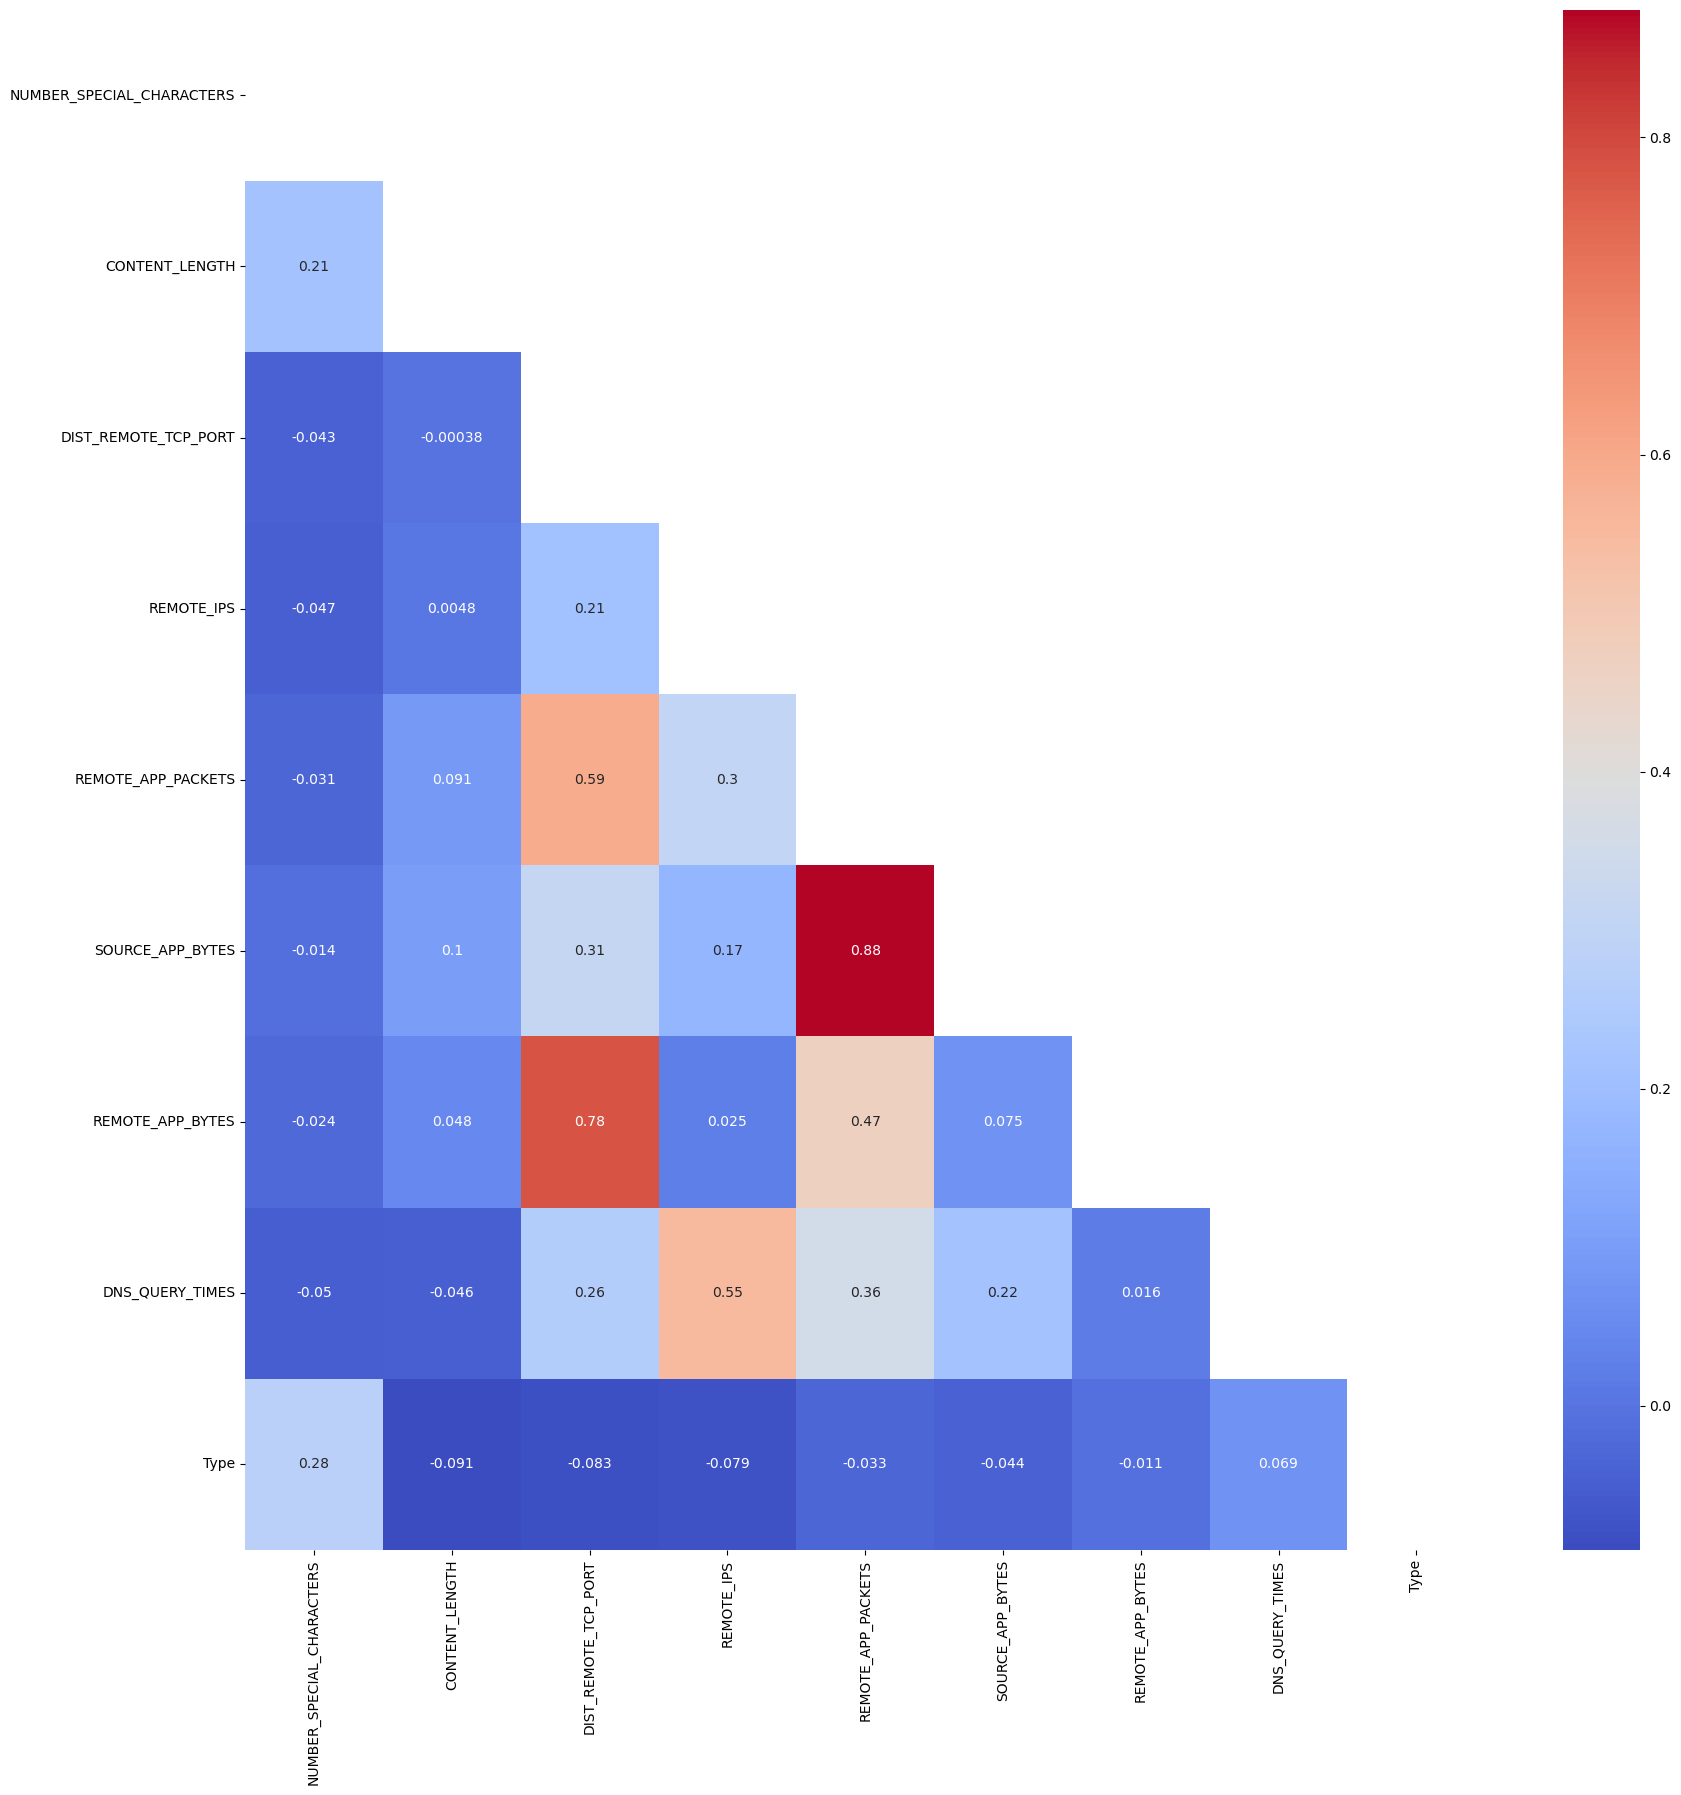

In [12]:
websites_after_corr3 = websites_after_corr2.drop(["URL_LENGTH"], axis=1)

mask = np.triu(np.ones_like(websites_after_corr3.corr(), dtype=bool))

fig = plt.figure(figsize=(20, 20))
sns.heatmap(websites_after_corr3.corr(), annot=True, cmap="coolwarm", mask=mask)  
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [13]:
# Your code here

websites.isnull().sum()


URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [14]:
#SERVER                       176
#CONTENT_LENGTH               812
#WHOIS_COUNTRY                306
#WHOIS_STATEPRO               362
#WHOIS_REGDATE                127
#WHOIS_UPDATED_DATE           139

In [15]:
websites.shape

(1781, 21)

In [16]:
Ratio1 = 176/1781
Ratio2 = 812/1781
Ratio3 = 306/1781
Ratio4 = 362/1781
Ratio5 = 127/1781
Ratio6 = 139/1781

print(Ratio1)
print(Ratio2)
print(Ratio3)
print(Ratio4)
print(Ratio5)
print(Ratio6)

0.09882088714205503
0.45592363840539024
0.17181358787198203
0.20325659741718136
0.07130825379000562
0.07804604154969118


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [17]:
# Your code here

#I would drop:
#CONTENT_LENGTH               812


websites_review = websites.drop(["CONTENT_LENGTH"], axis=1)

In [18]:
websites_review.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [19]:
# Your comment here
websites_review.dropna(inplace=True)


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [20]:
# Examine missing values in each column
websites_review.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

In [21]:
websites_review.shape

(1257, 20)

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [22]:
# Your code here

#I think it would be easy to UPPER case everything 

websites_review["WHOIS_COUNTRY"] = websites_review["WHOIS_COUNTRY"].str.upper()

websites_review["WHOIS_COUNTRY"].value_counts()


WHOIS_COUNTRY
US                960
CA                 75
ES                 63
AU                 26
PA                 21
GB                 13
JP                 10
IN                  8
CZ                  8
CN                  8
RU                  6
[U'GB'; U'UK']      5
NL                  5
CH                  5
UK                  4
BS                  4
AT                  4
KY                  3
PH                  3
SC                  3
UY                  2
UA                  2
KG                  2
HK                  2
SI                  2
TR                  1
PK                  1
IL                  1
DE                  1
SE                  1
IT                  1
NO                  1
BE                  1
BY                  1
AE                  1
IE                  1
UG                  1
LV                  1
Name: count, dtype: int64

In [23]:
websites_review["WHOIS_COUNTRY"] = websites_review["WHOIS_COUNTRY"].replace("[U'GB'; U'UK']", 'UK')
websites_review["WHOIS_COUNTRY"].value_counts()


WHOIS_COUNTRY
US    960
CA     75
ES     63
AU     26
PA     21
GB     13
JP     10
UK      9
CZ      8
CN      8
IN      8
RU      6
NL      5
CH      5
BS      4
AT      4
KY      3
PH      3
SC      3
UA      2
UY      2
KG      2
HK      2
SI      2
TR      1
PK      1
IL      1
DE      1
SE      1
IT      1
NO      1
BE      1
BY      1
AE      1
IE      1
UG      1
LV      1
Name: count, dtype: int64

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

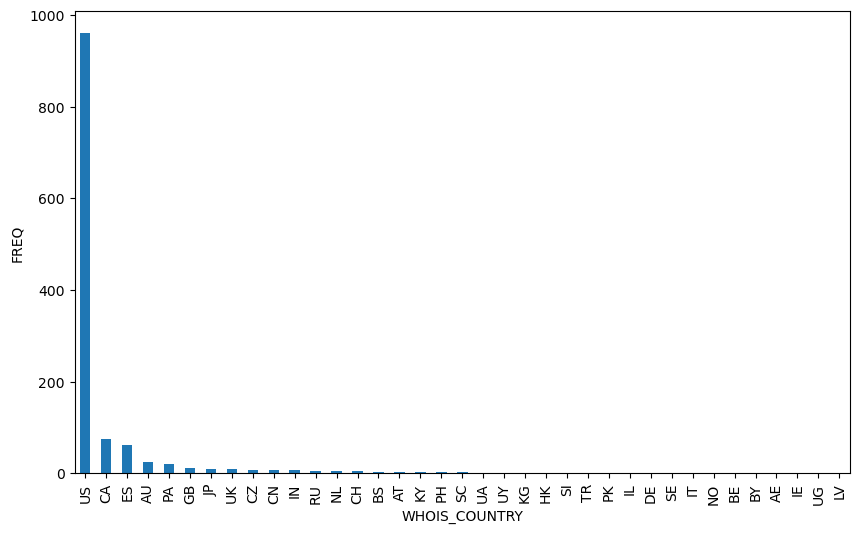

In [24]:
# Your code here

value_counts = websites_review["WHOIS_COUNTRY"].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind="bar")
plt.xlabel("WHOIS_COUNTRY")
plt.ylabel("FREQ")
plt.show()


#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [25]:
# Your code here

#I will keep 11 because all other are bellow 8 value_count

column_counts = websites_review["WHOIS_COUNTRY"].value_counts().head(12)
column_counts

WHOIS_COUNTRY
US    960
CA     75
ES     63
AU     26
PA     21
GB     13
JP     10
UK      9
CZ      8
CN      8
IN      8
RU      6
Name: count, dtype: int64

In [26]:
other_mapping = {
    "NL": "OTHER",
    "CH": "OTHER",
    "BS": "OTHER",
    "RU": "OTHER",
    "AT": "OTHER",
    "KY": "OTHER",
    "PH": "OTHER",
    "SC": "OTHER",
    "HK": "OTHER",
    "UY": "OTHER",
    "UA": "OTHER",
    "KG": "OTHER",
    "SI": "OTHER",
    "RU": "OTHER",
    "ru": "OTHER",
    "TR": "OTHER",
    "UG": "OTHER",
    "PK": "OTHER",
    "IL": "OTHER",
    "DE": "OTHER",
    "SE": "OTHER",
    "IT": "OTHER",
    "NO": "OTHER",
    "BE": "OTHER",
    "BY": "OTHER",
    "AE": "OTHER",
    "IE": "OTHER",
    "LV": "OTHER"
}

websites_review["WHOIS_COUNTRY"] = websites_review["WHOIS_COUNTRY"].replace(other_mapping)
websites_review["WHOIS_COUNTRY"].value_counts()

WHOIS_COUNTRY
US       960
CA        75
ES        63
OTHER     56
AU        26
PA        21
GB        13
JP        10
UK         9
IN         8
CN         8
CZ         8
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [27]:
# Your code here

websites_review = websites_review.drop(["WHOIS_STATEPRO", "WHOIS_REGDATE", "WHOIS_UPDATED_DATE"], axis=1)
websites_review.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
3,B0_113,17,6,ISO-8859-1,nginx,US,31,22,3,3812,39,37,18784,4380,39,8.0,0
5,B0_2064,18,7,UTF-8,nginx,OTHER,11,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,US,12,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,US,0,0,0,0,0,0,0,0,0,0.0,0
10,B0_1013,20,6,utf-8,Apache,US,0,0,0,0,0,0,0,0,0,0.0,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [28]:
# Your code here

websites_review.dtypes


URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [29]:
# Your code here

websites_review = websites_review.drop(["URL"], axis=1)


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [30]:
# Your code here

websites_review["CHARSET"].value_counts()

CHARSET
UTF-8           520
utf-8           279
ISO-8859-1      275
us-ascii         98
iso-8859-1       83
windows-1251      1
windows-1252      1
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [31]:
# Your code here

websites_review["SERVER"].value_counts()


SERVER
Apache                                                                                311
nginx                                                                                 144
cloudflare-nginx                                                                       80
Microsoft-HTTPAPI/2.0                                                                  76
GSE                                                                                    49
                                                                                     ... 
Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40      1
mw2114.codfw.wmnet                                                                      1
mw2199.codfw.wmnet                                                                      1
fbs                                                                                     1
Apache/2.2.16 (Debian)                                                                  1
Nam

![Think Hard](../images/think-hard.jpg)

In [32]:
# Your comment here

#I would search for similar names. For example Apache seams to appear other times in deferent names


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [33]:
# Your code here

def server_cat(column):
    if "Apache" in str(column):
        return "Apache"
    if "Microsoft" in str(column):
        return "Microsoft"
    if "nginx" in str(column):
        return "nginx"
    else:
        return "Other"

websites_review["SERVER"] = websites_review["SERVER"].apply(server_cat)


In [34]:
# Count `SERVER` value counts here

websites_review["SERVER"].value_counts()


SERVER
Apache       491
nginx        322
Other        300
Microsoft    144
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [35]:
# Your code here

websites_review_dummy = pd.get_dummies(websites_review, columns=["WHOIS_COUNTRY", "CHARSET", "SERVER"])


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [36]:
# Your code here

websites_review_dummy.dtypes


URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
WHOIS_COUNTRY_AU                bool
WHOIS_COUNTRY_CA                bool
WHOIS_COUNTRY_CN                bool
WHOIS_COUNTRY_CZ                bool
WHOIS_COUNTRY_ES                bool
WHOIS_COUNTRY_GB                bool
WHOIS_COUNTRY_IN                bool
WHOIS_COUNTRY_JP                bool
WHOIS_COUNTRY_OTHER             bool
WHOIS_COUNTRY_PA                bool
WHOIS_COUNTRY_UK                bool
WHOIS_COUNTRY_US                bool
CHARSET_ISO-8859-1              bool
CHARSET_UTF-8                   bool
C

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [37]:
from sklearn.model_selection import train_test_split

# Your code here:

X_train, X_test, y_train, y_test = train_test_split(websites_review_dummy.drop(columns=["Type"]), 
                                                    websites_review_dummy["Type"],test_size=0.2, 
                                                    random_state=0)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [38]:
# Your code here:
from sklearn.linear_model import LogisticRegression

website_model = LogisticRegression()


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [39]:
# Your code here:

website_model.fit(X_train, y_train)

/Users/josecerqueira/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [40]:
# Your code here:

from sklearn.metrics import accuracy_score

y_pred = website_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9444444444444444

In [41]:
from sklearn.metrics import confusion_matrix

import plotly.express as px
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm.rename({1: 'Yes - Pred', 0: 'No - Pred'}, axis=1, inplace=True)
cm.rename({1: 'Yes - True', 0: 'No - True'}, axis=0, inplace=True)
px.imshow(cm, text_auto=True, color_continuous_scale='RdBu', color_continuous_midpoint=0)



In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       221
           1       0.84      0.68      0.75        31

    accuracy                           0.94       252
   macro avg       0.90      0.83      0.86       252
weighted avg       0.94      0.94      0.94       252



What are your thoughts on the performance of the model? Write your conclusions below.

In [43]:
# Your conclusions here:

#The model performs good for the 0 class but need improvement for the class 1, witch is the reason for this.
#The recall for class 0 says that the model identifies 
# 98% of class 0. In class 1, the recall is 68%, 
# saying that the model identifies 68% of class 1.

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [44]:
# Your code here:

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)


In [45]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
from sklearn.metrics import accuracy_score

y_pred = knn_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9285714285714286

In [47]:
from sklearn.metrics import confusion_matrix

import plotly.express as px
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm.rename({1: 'Yes - Pred', 0: 'No - Pred'}, axis=1, inplace=True)
cm.rename({1: 'Yes - True', 0: 'No - True'}, axis=0, inplace=True)
px.imshow(cm, text_auto=True, color_continuous_scale='RdBu', color_continuous_midpoint=0)

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       221
           1       0.71      0.71      0.71        31

    accuracy                           0.93       252
   macro avg       0.83      0.83      0.83       252
weighted avg       0.93      0.93      0.93       252



To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [49]:
#Above

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [50]:
# Your code here:

knn_model_2 = KNeighborsClassifier(n_neighbors=5)
knn_model_2.fit(X_train, y_train)


KNeighborsClassifier()

In [51]:
y_pred = knn_model_2.predict(X_test)

accuracy_score(y_test, y_pred)

0.9365079365079365

In [52]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm.rename({1: 'Yes - Pred', 0: 'No - Pred'}, axis=1, inplace=True)
cm.rename({1: 'Yes - True', 0: 'No - True'}, axis=0, inplace=True)
px.imshow(cm, text_auto=True, color_continuous_scale='RdBu', color_continuous_midpoint=0)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       221
           1       0.78      0.68      0.72        31

    accuracy                           0.94       252
   macro avg       0.87      0.83      0.84       252
weighted avg       0.93      0.94      0.93       252



Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [56]:
# Your conclusions here:

#We have a improvement in accuracy score and a small improvement for the 0 class but we get less precision and recall for the class 1.
#I would keep the k in 3.

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [55]:
# Your code here